In [ ]:
#lasio is required to convert data from las to xlsx format
!pip install lasio


In [ ]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lasio
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#Convert the data from las to xlsx

data_df = pd.read_excel('D2.xlsx',sheet_name =1)  #for different data edit the csv name
D11 = pd.DataFrame(data_df)
data_df.head(-20)

FileNotFoundError: ignored

In [ ]:
# Read & define the dataset required and some data cleaning

D1  = pd.DataFrame(D11.iloc[:,1:6]) #edit check the order no.is correct
D1  = D1.dropna()                   #print(D1)
D1  = D1.reset_index(drop=True)
D1['RACLX'] = np.log10(D1['RACLX'])
D1x = D1.loc[: , ['BDCX', 'GR1AX', 'RACLX']].copy()
D1y = pd.DataFrame(D1['NPLX'])/100
D1y = D1y.clip(lower = float(0))
D1x                             #print(D1x,D1y)

NameError: ignored

In [ ]:
#Scaling

sc_data = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc_data.fit_transform(D1x)
tt = pd.DataFrame((training_set_scaled))
training_data = pd.concat([tt,D1y],axis=1)  #print(type(D1c))  #D1c = D1x.append(D1y)  #D1y.min()
training_data          #D1x.max()      #train.max()   #len(training_data)


In [ ]:
#Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split( training_data.iloc[:,:-1], training_data.iloc[:,-1], test_size=0.33, shuffle=False)
#print(training_data.iloc[:,:-1], training_data.iloc[:,-1],'\n')
print('\n', X_test,y_test) #X_train, y_train,
type(y_train)

NameError: ignored

In [ ]:
X_test.loc[(5513):5523-1, :]

In [ ]:
#Splitting data into time steps

X_train_ts ,y_train_ts,X_test_ts ,y_test_ts = [],[],[],[]
ls = 4  #time steps

#For training data
for i in range(ls, (X_train.shape[0])): # upper bound is number of values
  X_train_ts.append(X_train.iloc[(i-ls):i, :]) # takes ls previous values from 'ls' past values
  y_train_ts.append(y_train[i-ls]) #contains values learned to predict  #print(len(X_train))

#For test data
for j in range(X_train.shape[0]+ls, training_data.shape[0]):
  #print(j-ls,j)
  X_test_ts.append(X_test.loc[(j-ls):j-1, :])
  y_test_ts.append(y_test[j-ls])

X_train_ts, y_train_ts = np.array(X_train_ts), np.array(y_train_ts)
X_test_ts,  y_test_ts  = np.array(X_test_ts),  np.array(y_test_ts )  #print(X_train_ts,y_train_ts)
#X_test_ts


NameError: ignored

In [ ]:
#Building LSTM Model:

#First layer
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = False, input_shape = (X_train_ts.shape[1],X_train_ts.shape[2])))
regressor.add(Dropout(0.2))

#Second layer
#regressor.add(LSTM(units = 16, return_sequences = True))
#regressor.add(Dropout(0.2))

#Third layer
#regressor.add(LSTM(units = 8, return_sequences = True))
#regressor.add(Dropout(0.2))

#Fourth layer
#regressor.add(LSTM(units = 2, return_sequences = False))
#regressor.add(Dropout(0.2))

#Final Dense layer
regressor.add(Dense(1))

#Cost Function and Optimizer
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
regressor.compile(optimizer = opt, loss = 'mean_squared_error',  )
regressor.summary()

In [ ]:
#Fitting the model

history = regressor.fit(X_train_ts, y_train_ts, validation_split = 0.2, epochs = 50, batch_size = 32, verbose = 1)

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
real_por = y_test_ts
predicted_por = regressor.predict(X_test_ts)
plt.figure(figsize=(15,6))
plt.plot(real_por, color = 'red', label = 'Real Porosity')
plt.plot(predicted_por, color = 'blue', label = 'Predicted Porosity')
plt.title('Porosity Prediction')
plt.xlabel('Depth')
plt.ylabel('Porosity')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
# Visualising the results
plt.figure(figsize=(15,6))
plt.plot(real_por, color = 'red', label = 'Real Porosity')
plt.plot(predicted_por, color = 'blue', label = 'Predicted Porosity')
plt.title('Porosity Prediction')
plt.xlabel('Depth')
plt.ylabel('Porosity')
plt.legend()
plt.show()

In [ ]:
#Heatmap
sns.heatmap(training_data.corr(),linewidths=1)


NameError: ignored

In [ ]:

sns.heatmap(D1x.corr(),linewidths=1)

NameError: ignored

In [ ]:
#Building GRU Model:



#First layer
regressor_GRU = Sequential()
regressor_GRU.add(GRU(units = 50, return_sequences = False, input_shape = (X_train_ts.shape[1],X_train_ts.shape[2])))
#regressor_GRU.add(Dropout(0.2))

#Second layer
#regressor_GRU.add(LSTM(units = 16, return_sequences = True))
#regressor_GRU.add(Dropout(0.2))

#Third layer
#regressor_GRU.add(LSTM(units = 8, return_sequences = True))
#regressor_GRU.add(Dropout(0.2))

#Fourth layer
#regressor_GRU.add(LSTM(units = 2, return_sequences = False))
#regressor_GRU.add(Dropout(0.2))

#Final Dense layer
regressor_GRU.add(Dense(1))

#Cost Function and Optimizer
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
regressor_GRU.compile(optimizer = opt, loss = 'mean_squared_error',  )
regressor_GRU.summary()

AttributeError: ignored

In [ ]:
#Fitting the model

history_GRU = regressor_GRU.fit(X_train_ts, y_train_ts, validation_split = 0.2, epochs = 50, batch_size = 32, verbose = 1)

RuntimeError: ignored

In [ ]:
plt.plot(history_GRU.history['loss'], label='Training loss')
plt.plot(history_GRU.history['val_loss'], label='Validation loss')
plt.legend()

NameError: ignored

In [ ]:
predicted_por_GRU = regressor_GRU.predict(X_test_ts)
plt.figure(figsize=(15,6))
plt.plot(real_por, color = 'red', label = 'Real Porosity')
plt.plot(predicted_por_GRU, color = 'blue', label = 'Predicted Porosity')
plt.title('Porosity Prediction')
plt.xlabel('Depth')
plt.ylabel('Porosity')
plt.legend()
plt.show()

KeyError: ignored

In [ ]:
#Building SimpleRNN Model:

#First layer
regressor_SimpleRNN = Sequential()
regressor_SimpleRNN.add(SimpleRNN(units = 50, return_sequences = False, input_shape = (X_train_ts.shape[1],X_train_ts.shape[2])))
#regressor_SimpleRNN.add(Dropout(0.2))

#Second layer
#regressor_SimpleRNN.add(SimpleRNN(units = 16, return_sequences = True))
#regressor_SimpleRNN.add(Dropout(0.2))

#Third layer
#regressor_SimpleRNN.add(SimpleRNN(units = 8, return_sequences = True))
#regressor_SimpleRNN.add(Dropout(0.2))

#Fourth layer
#regressor_SimpleRNN.add(SimpleRNN(units = 2, return_sequences = False))
#regressor_SimpleRNN.add(Dropout(0.2))

#Final Dense layer
regressor_SimpleRNN.add(Dense(1))

#Cost Function and Optimizer
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
regressor_SimpleRNN.compile(optimizer = opt, loss = 'mean_squared_error',  )
regressor_SimpleRNN.summary()

In [ ]:
#Fitting the model

history_SimpleRNN = regressor_SimpleRNN.fit(X_train_ts, y_train_ts, validation_split = 0.2, epochs = 50, batch_size = 32, verbose = 1)

In [ ]:
plt.plot(history_SimpleRNN.history['loss'], label='Training loss')
plt.plot(history_SimpleRNN.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predicted_por_SimpleRNN = regressor_SimpleRNN.predict(X_test_ts)
plt.figure(figsize=(15,6))
plt.plot(real_por, color = 'red', label = 'Real Porosity')
plt.plot(predicted_por_SimpleRNN, color = 'blue', label = 'Predicted Porosity')
plt.title('Porosity Prediction')
plt.xlabel('Depth')
plt.ylabel('Porosity')
plt.legend()
plt.show()

In [ ]:
print(mean_squared_error(real_por, predicted_por_SimpleRNN))

0.0016379440720113902
0.006693579790016671


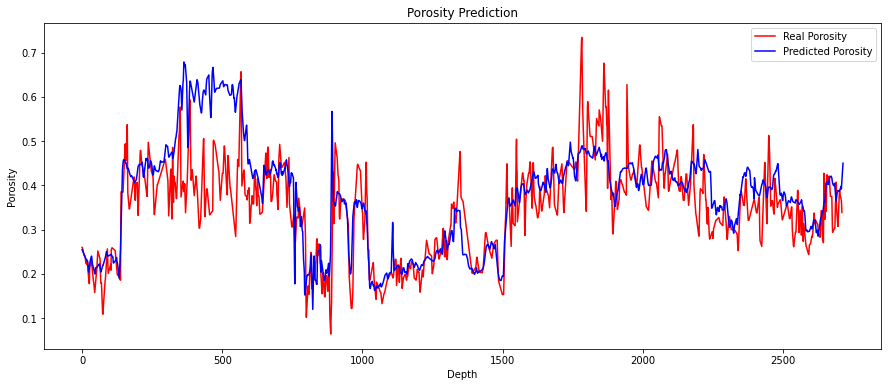

In [ ]:
#Building Linear Regression Model:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_test  = lr.predict(X_test)
print(mean_squared_error(y_train,y_pred_lr_train) )
print(mean_squared_error(y_test,y_pred_lr_test)   )


# Plot of test data with prediction
plt.figure(figsize=(15,6))
plt.plot(real_por, color = 'red', label = 'Real Porosity')
plt.plot(y_pred_lr_test, color = 'blue', label = 'Predicted Porosity')
plt.title('Porosity Prediction')
plt.xlabel('Depth')
plt.ylabel('Porosity')
plt.legend()
plt.show()

0.0016437846837268504
0.005287203967018075


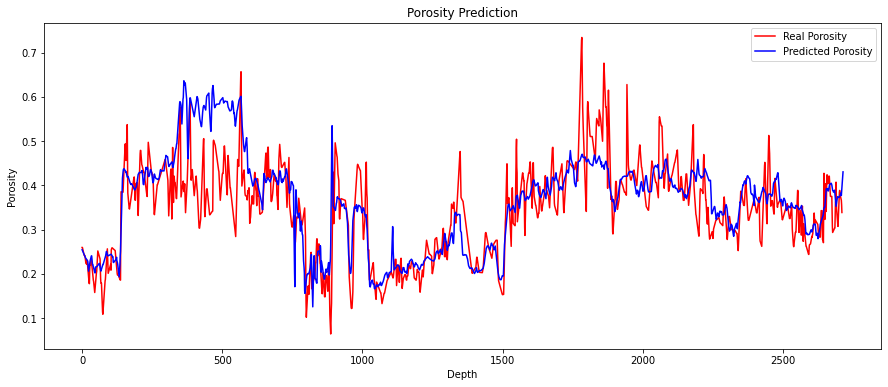

In [ ]:
#Building Lasso Model:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
ls = Lasso(alpha=0.0001)
ls.fit(X_train,y_train)
y_pred_ls_train = ls.predict(X_train)
y_pred_ls_test  = ls.predict(X_test)
print(mean_squared_error(y_train,y_pred_ls_train) )
print(mean_squared_error(y_test, y_pred_ls_test )   )


# Plot of test data with prediction
plt.figure(figsize=(15,6))
plt.plot(real_por, color = 'red', label = 'Real Porosity')
plt.plot(y_pred_ls_test, color = 'blue', label = 'Predicted Porosity')
plt.title('Porosity Prediction')
plt.xlabel('Depth')
plt.ylabel('Porosity')
plt.legend()
plt.show()

0.0016976754240586257
0.003654892868467854


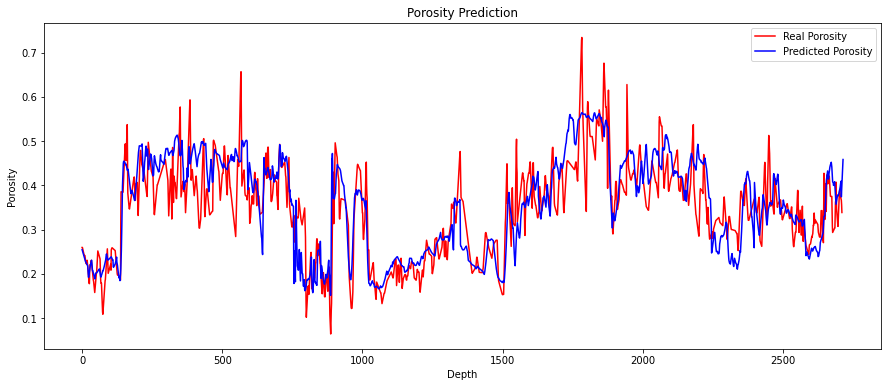

In [ ]:
#Building SVR Model:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svr = SVR()
svr.fit(X_train,y_train)
y_pred_svr_train = svr.predict(X_train)
y_pred_svr_test  = svr.predict(X_test)
print(mean_squared_error(y_train,y_pred_svr_train) )
print(mean_squared_error(y_test,y_pred_svr_test)   )


# Plot of test data with prediction
plt.figure(figsize=(15,6))
plt.plot(real_por, color = 'red', label = 'Real Porosity')
plt.plot(y_pred_svr_test, color = 'blue', label = 'Predicted Porosity')
plt.title('Porosity Prediction')
plt.xlabel('Depth')
plt.ylabel('Porosity')
plt.legend()
plt.show()

0.0010397303584969006
0.006010549114114752


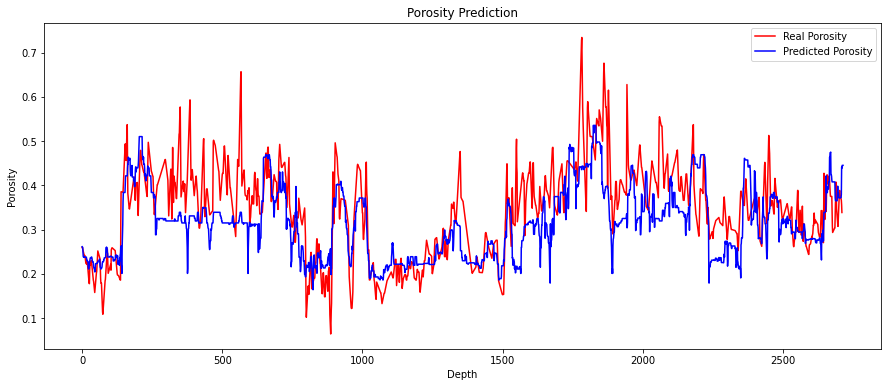

In [ ]:
#Building GBR Model:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred_gbr_train = gbr.predict(X_train)
y_pred_gbr_test  = gbr.predict(X_test)
print(mean_squared_error(y_train,y_pred_gbr_train) )
print(mean_squared_error(y_test,y_pred_gbr_test) )

# Plot of test data with prediction
plt.figure(figsize=(15,6))
plt.plot(real_por, color = 'red', label = 'Real Porosity')
plt.plot(y_pred_gbr_test, color = 'blue', label = 'Predicted Porosity')
plt.title('Porosity Prediction')
plt.xlabel('Depth')
plt.ylabel('Porosity')
plt.legend()
plt.show()


[23:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.00017868239293516313
0.008429506982839896


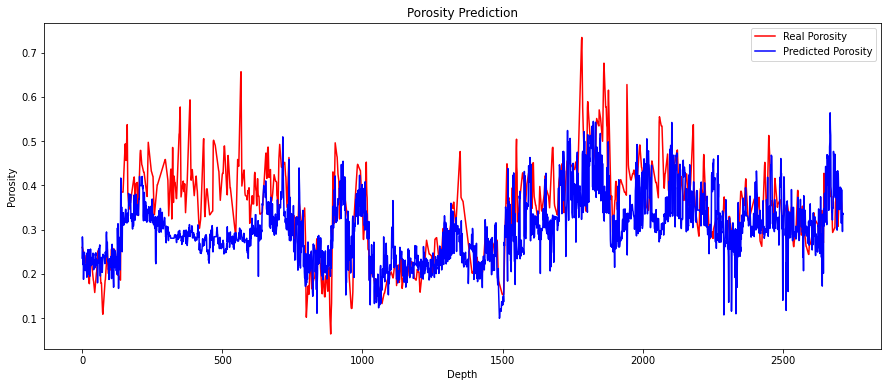

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 15, alpha = 10, n_estimators = 500)
xg_reg.fit(X_train,y_train)
y_pred_xg_reg_train = xg_reg.predict(X_train)
y_pred_xg_reg_test = xg_reg.predict(X_test)
print(mean_squared_error(y_train,y_pred_xg_reg_train) )
print(mean_squared_error(y_test,y_pred_xg_reg_test) )

# Plot of test data with prediction
plt.figure(figsize=(15,6))
plt.plot(real_por, color = 'red', label = 'Real Porosity')
plt.plot(y_pred_xg_reg_test, color = 'blue', label = 'Predicted Porosity')
plt.title('Porosity Prediction')
plt.xlabel('Depth')
plt.ylabel('Porosity')
plt.legend()
plt.show()
